# Yelp Business Intelligence Data Analysis

We are analyzing Yelp Business, Reviews and User data to generate insights for business.
##### Data Source: Kaggle

### List of Packages Available

In [1]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1588623120245_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

### Required Packages Installation and Verification

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.2.0
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pandas                     1.0

### Data Analysis Code

In [3]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# Load Yelp Business Data from public s3 bucket for data analysis using spark load
df_biz = spark.read.json("s3://yelps3/Yelp_dataset/yelp_academic_dataset_business.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
# Display Overview of Data
print(f'Total Columns:{len(df_biz.columns)}')
print(f'Total Rows:{df_biz.count()}')
df_biz.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns:14
Total Rows:209393
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = 

#### Data Overview with important columns
* business_id
* name
* city
* state
* categories


In [6]:
# Filter and display head
df_biz.select('business_id','name', 'city','state', 'stars', 'categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+
|         business_id|                name|           city|state|stars|          categories|
+--------------------+--------------------+---------------+-----+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+-----+--------------------+
only showing top 5 rows

#### Analyzing Business Categories

Answering the following questions:
1. How many unique categories are represented in this dataset?
2. How many businesses are categorized as Active Life? (Can be used for other business categories)
3. Top 20 Business Categories


In [7]:
from pyspark.sql.functions import split, explode

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
# Filter relevant columns "business_id" and "categories"
df_bizcat = df_biz.select('business_id','categories')
df_bizcat.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|f9NumwFMBDn751xgF...|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|Health & Medical,...|
|XNoUzKckATkOD1hP6...|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|Home Services, Pl...|
+--------------------+--------------------+
only showing top 5 rows

We notice that one business falls under multiple business categories and hence data cannot be easily analyzed.

##### Split rows into individual category entry

In [9]:
df_bizcat = df_bizcat.select('business_id','categories').withColumn("categories",explode(split("categories",", ")))
df_bizcat.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|      categories|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

##### Data Analysis to answer business questions

In [10]:
# Counting unqiue categories
cat_count = df_bizcat.select('categories').distinct().count()
print(f'Total unqiue categories: {cat_count}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total unqiue categories: 1336

In [11]:
# Count Businesses in each category
df_catcount = df_bizcat.groupBy('categories').count()
df_catcount.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|         categories|count|
+-------------------+-----+
|     Paddleboarding|   36|
|     Dermatologists|  341|
|   Historical Tours|   54|
|   Hot Air Balloons|   21|
|Mobile Home Dealers|   16|
+-------------------+-----+
only showing top 5 rows

In [12]:
# Find number of businesses listed as Active Life category

df_catcount[df_catcount.categories == "Active Life"].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----+
| categories|count|
+-----------+-----+
|Active Life|10225|
+-----------+-----+

In [13]:
# Sort count dataframe and display top 20 business categories
df_catcount.sort('count',ascending = False).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|63944|
|            Shopping|34644|
|                Food|32991|
|       Home Services|22487|
|       Beauty & Spas|20520|
|    Health & Medical|19227|
|      Local Services|15783|
|          Automotive|14720|
|           Nightlife|14211|
|                Bars|12400|
|Event Planning & ...|11263|
|         Active Life|10225|
|        Coffee & Tea| 8415|
|             Fashion| 8374|
|           Fast Food| 8106|
|          Sandwiches| 8064|
|American (Traditi...| 7596|
|       Home & Garden| 7331|
|         Hair Salons| 7303|
|               Pizza| 7302|
+--------------------+-----+
only showing top 20 rows

In [14]:
# Convert Spark SQL dataframe to Pandas Dataframe for easy plotting

df_catplot = df_catcount.sort('count',ascending = False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

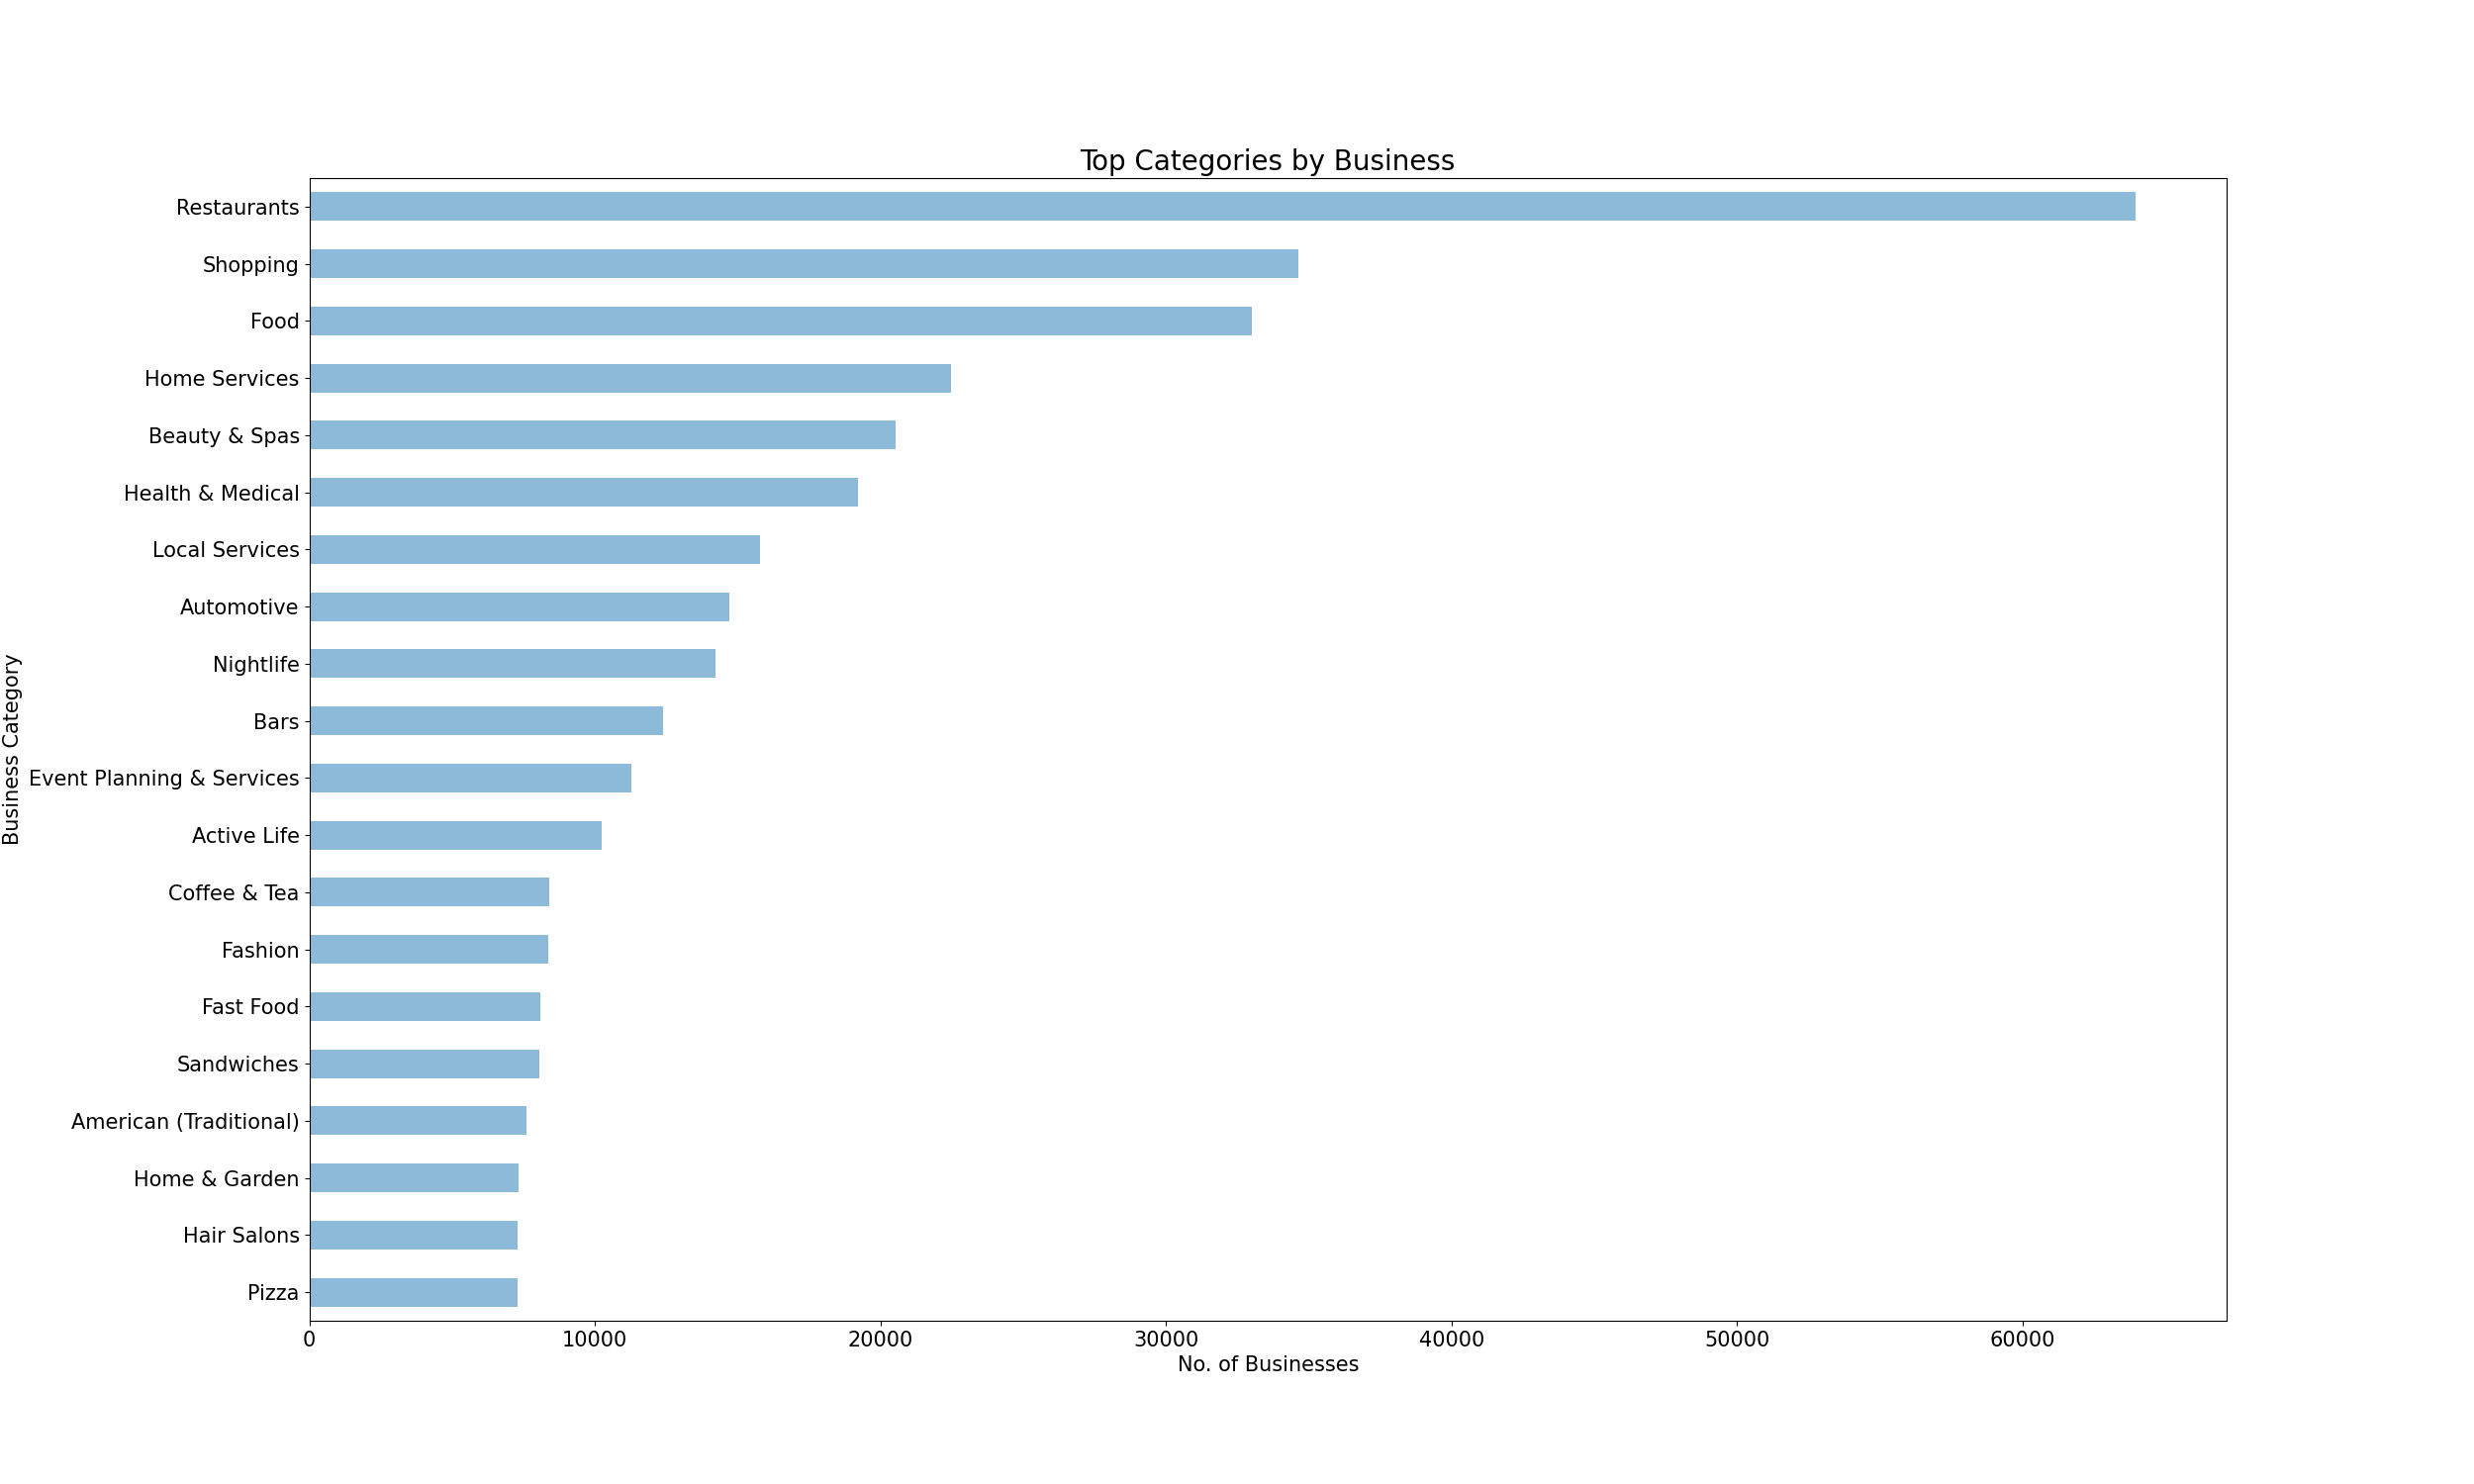

In [15]:
# Create Plot of Top 20 Business Categories
df_catplot = df_catplot.head(20)
df_catplot.plot.barh('categories','count',figsize = (25,15),legend = False, alpha = 0.5).invert_yaxis()
plt.xlabel("No. of Businesses",x=0.5,size=15)
plt.ylabel("Business Category",y=0.5,size=15)
plt.title("Top Categories by Business", fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
%matplot plt

#### Analyse Yelp Ratings Skewness
We will try to analyze the skewness in Yelp Ratings between total ratings and ratings from review writers.

In [16]:
# Load Yelp Review Data from public s3 bucket for data analysis using spark load
df_rev = spark.read.json("s3://yelps3/Yelp_dataset/yelp_academic_dataset_review.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
# Display Overview of Review Data
print(f'Total Columns:{len(df_rev.columns)}')
print(f'Total Rows:{df_rev.count()}')
df_rev.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns:9
Total Rows:8021122
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [18]:
#Filter relevent columns 'business_id' and 'stars'
df_revstars = df_rev.select('business_id','stars')
df_revstars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [19]:
# Average the star ratings from each review for each business
df_revstars = df_revstars.groupBy('business_id').avg()
df_revstars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

In [20]:
# Inner Join Business Dataframe with Average Review Dataframe 
df_bizrev = df_biz.join(df_revstars, on=['business_id'], how='inner')
df_bizrev = df_bizrev.select('avg(stars)','stars','name','city','state')
df_bizrev.sort('avg(stars)',ascending=False).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+---------+-----+
|avg(stars)|stars|                name|     city|state|
+----------+-----+--------------------+---------+-----+
|       5.0|  5.0|Carbonation Craft...|Cornelius|   NC|
|       5.0|  5.0|PartyZams Singing...|Las Vegas|   NV|
|       5.0|  5.0|Design Array Gara...|   Peoria|   AZ|
|       5.0|  5.0|Andre Agassi Coll...|Las Vegas|   NV|
|       5.0|  5.0|       The Elf Squad|Charlotte|   NC|
+----------+-----+--------------------+---------+-----+
only showing top 5 rows

In [21]:
# Calculate Skew for Each Business
df_bizrev = df_bizrev.withColumn('skew',(df_bizrev['avg(stars)'] - df_bizrev['stars'])/df_bizrev['stars'])
df_bizrev.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+--------------------+
|        avg(stars)|stars|                name|       city|state|                skew|
+------------------+-----+--------------------+-----------+-----+--------------------+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|0.029460352422907565|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|-0.06666666666666661|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|-0.02777777777777...|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|-0.04761904761904...|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|                 0.0|
+------------------+-----+--------------------+-----------+-----+--------------------+
only showing top 5 rows

In [22]:
# Convert Ratings Dataframe to Pandas for Plotting

df_skewplot = df_bizrev.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

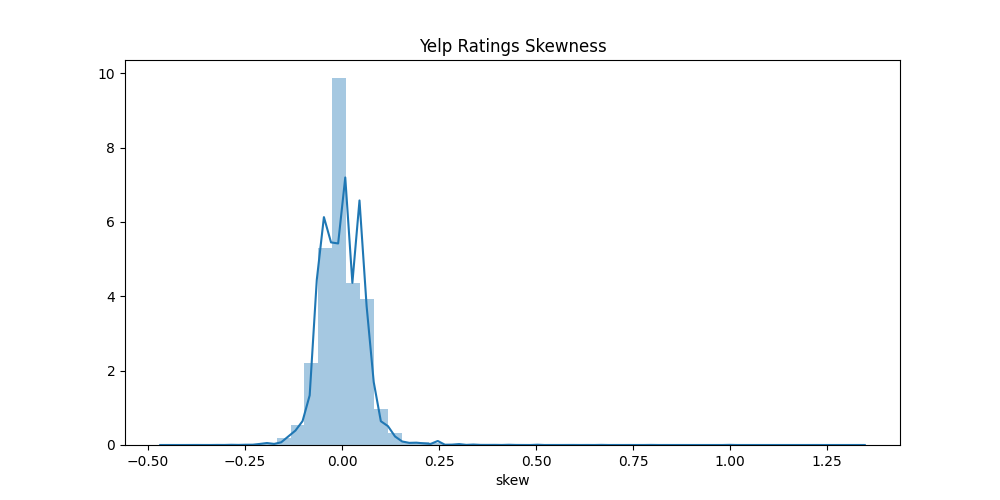

In [23]:
# Import seaborn to plot skewness
import seaborn

#Plot skewness
fig, ax = plt.subplots(figsize=(10,5))

seaborn.distplot(df_skewplot['skew'], ax=ax)
ax.set_title('Yelp Ratings Skewness')
%matplot plt

#### Should Elite reviewers be trusted with their reviews?

We notice that Yelp provides elite status to regular reviewers, we will analyze if these elite reviewers actually provide relevant reviews to actual ratings or is there a skewness in their ratings.

In [24]:
# Load Yelp User Data from public s3 bucket for data analysis using spark load
df_user = spark.read.json("s3://yelps3/Yelp_dataset/yelp_academic_dataset_user.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
# Display Overview of Data
print(f'Total Columns:{len(df_user.columns)}')
print(f'Total Rows:{df_user.count()}')
df_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns:22
Total Rows:1968703
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [26]:
# Filter Elite Users and relevant columns
df_elite = df_user[df_user.elite !=""]
df_elite = df_elite.select("user_id","elite","review_count")
df_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------+
|             user_id|               elite|review_count|
+--------------------+--------------------+------------+
|FOBRPlBHa3WPHFB5q...|2008,2009,2010,20...|         564|
|zZUnPeh2hEp0WydbA...|                2010|          60|
|QaELAmRcDc5TfJEyl...|                2009|         206|
|xvu8G900tezTzbbfq...|2009,2010,2011,20...|         485|
|z5_82komKV3mI4ASG...|                2007|         186|
+--------------------+--------------------+------------+
only showing top 5 rows

In [27]:
# Inner Join Reviews Dataframe and Elite Dataframe
df_revelite = df_elite.join(df_rev, on='user_id',how='inner')
df_revelite = df_revelite.select("business_id","stars").groupBy("business_id").avg()
df_revelite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ipFreSFhjClfNETuM...|3.0588235294117645|
|OyhCNhJJuJjUt2avx...| 3.282051282051282|
|eKznX8VTfcQrjCqXp...| 4.268817204301075|
|--9e1ONYQuAa-CB_R...|4.1916058394160585|
|-r8SvItXXG6_T3mP5...|               3.5|
+--------------------+------------------+
only showing top 5 rows

In [28]:
#Inner Join Elite Reviews Dataframe and Business Dataframe
df_bizelite = df_biz.join(df_revelite, on=['business_id'], how='inner').select('avg(stars)','stars','name','business_id')
df_bizelite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+--------------------+
|        avg(stars)|stars|                name|         business_id|
+------------------+-----+--------------------+--------------------+
|3.0588235294117645|  2.5|  Doogan's of Aurora|ipFreSFhjClfNETuM...|
| 3.282051282051282|  3.0|       Chocolate Bar|OyhCNhJJuJjUt2avx...|
| 4.268817204301075|  4.5|                Rasa|eKznX8VTfcQrjCqXp...|
|4.1916058394160585|  4.0|Delmonico Steakhouse|--9e1ONYQuAa-CB_R...|
|               3.5|  4.0| Western Coffee Shop|-r8SvItXXG6_T3mP5...|
+------------------+-----+--------------------+--------------------+
only showing top 5 rows

In [29]:
# Calculate Skewness in Elite Ratings
df_bizelite = df_bizelite.withColumn('Elite_skew',(df_bizelite['avg(stars)'] - df_bizelite['stars'])/df_bizelite['stars'])
df_bizelite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+--------------------+--------------------+
|        avg(stars)|stars|                name|         business_id|          Elite_skew|
+------------------+-----+--------------------+--------------------+--------------------+
| 4.583333333333333|  4.5|      Chocolate Swan|BD18SKv935HDmlKrL...| 0.01851851851851845|
| 4.240282685512367|  4.0|        Roaring Fork|j2bx_ctb_ED3zbfSa...|0.060070671378091856|
|4.1916058394160585|  4.0|Delmonico Steakhouse|--9e1ONYQuAa-CB_R...|0.047901459854014616|
| 3.776470588235294|  3.5|              Target|JsUytp_MuZ4AX5JWf...| 0.07899159663865543|
| 4.538461538461538|  4.5|US National White...|56HZLqQOcS1FSXqYG...|0.008547008547008517|
+------------------+-----+--------------------+--------------------+--------------------+
only showing top 5 rows

In [30]:
# Convert Elite Ratings Dataframe to Pandas for Plotting

df_skewelite = df_bizelite.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

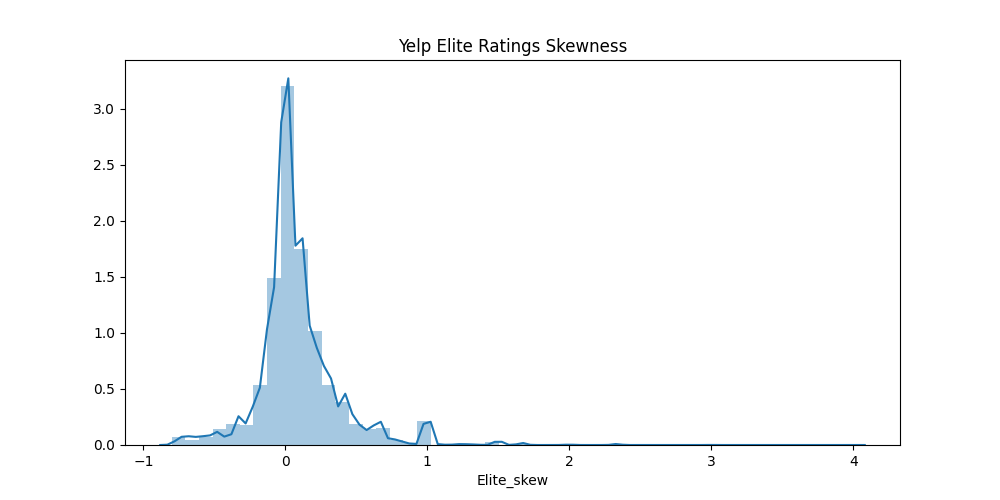

In [31]:
#Plot elite skewness
fig, ax = plt.subplots(figsize=(10,5))

seaborn.distplot(df_skewelite['Elite_skew'], ax=ax)
ax.set_title('Yelp Elite Ratings Skewness')
%matplot plt